# Laporan Proyek Machine Learning - Novan Nur Hidayat

## PENERAPAN ANALISIS PREDIKSI UNTUK HARGA RUMAH (STUDI KASUS: SEATTLE, WASHING, USA)

## Data Understanding

Pasar real estate, seperti yang ada di Seattle, Washing, USA, menghadirkan peluang menarik bagi analis data untuk menganalisis dan memprediksi ke mana harga properti bergerak. Prediksi harga properti menjadi semakin penting dan menguntungkan. Harga properti merupakan indikator yang baik dari kondisi pasar secara keseluruhan dan kesehatan ekonomi suatu negara. Mempertimbangkan data yang diberikan, dalam memperdebatkan sejumlah besar catatan penjualan properti yang disimpan dalam format yang tidak diketahui dan dengan masalah kualitas data yang tidak diketahui.
Data yang digunakan dalam proyek ini bersumber dari Kaggle (kaggle datasets download -d samuelcortinhas/house-price-prediction-seattle)

In [1]:
# import semua library yang dibutuhkan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [2]:
# meload data
rumah = pd.read_csv('train.csv')
rumah

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0
...,...,...,...,...,...,...,...,...
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2012,1,1.0,889.0,sqft,NaN,NaN,98121,550000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0
2014,2,2.0,795.0,sqft,NaN,NaN,98103,590000.0


### Variabel-variabel pada House Price Prediction dataset adalah sebagai berikut:

- beds : jumlah kamar tidur di properti.
- baths : Jumlah kamar mandi di properti. Catatan 0,5 sesuai dengan setengah bak mandi yang memiliki wastafel dan toilet tetapi tidak ada bak mandi atau pancuran.
- size : Total luas lantai properti.
- size_units : Unit pengukuran sebelumnya.
- lot_size : Total luas tanah tempat properti berada. Tanah itu milik pemilik rumah.
- lot_size_units : Unit pengukuran sebelumnya.
- zip_code : Kode pos. Ini adalah kode pos yang digunakan di AS.
- price : Harga properti dijual seharga (dolar AS).

In [3]:
# mengecek informasi pada dataset
rumah.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [4]:
# mengecek deskripsi statistik data
rumah.describe()

,beds,baths,size,lot_size,zip_code,price
count,2016.000000,2016.000000,2016.000000,1669.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,3871.059694,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,2719.402066,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,0.230000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,1252.000000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,4000.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,6000.000000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,9998.000000,98199.000000,2.500000e+07


### Exploratory Data Analysis

- Menangani missing value

    Dari hasil output, terlihat bahwa kolom "lot_size" dan "lot_size_units" memiliki nilai yang hilang (NaN) sebanyak 347 data. Dengan menggunakan teknik dropna, sekarang DataFrame baru (rumah_cleaned_rows) tidak mengandung baris dengan nilai yang hilang di kolom "lot_size" dan "lot_size_units".

In [5]:
# menangani misssing value
jumlah_missing_per_kolom = rumah.isnull().sum()

# menampilkan hasil
jumlah_missing_per_kolom

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [6]:
# penghapusan baris yang mengandung nilai yang hilang
rumah = rumah.dropna(subset=['lot_size', 'lot_size_units'])
rumah

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
5,2,2.0,1190.0,sqft,1.00,acre,98107,740000.0
...,...,...,...,...,...,...,...,...
2009,3,3.5,1680.0,sqft,1486.00,sqft,98126,675000.0
2010,2,2.0,1400.0,sqft,0.34,acre,98199,699950.0
2011,3,2.0,1370.0,sqft,0.50,acre,98112,910000.0
2013,4,2.0,2140.0,sqft,6250.00,sqft,98199,1150000.0


- Menangani outliers

    Pada kasus ini, akan dideteksi outliers dengan teknik visualisasi data (boxplot). Kemudian, outliers akan ditangani dengan teknik IQR method. setelah ditangani dengan metode IQR method, dataset yang tersisa menjadi 1682 data.

<Axes: xlabel='beds'>

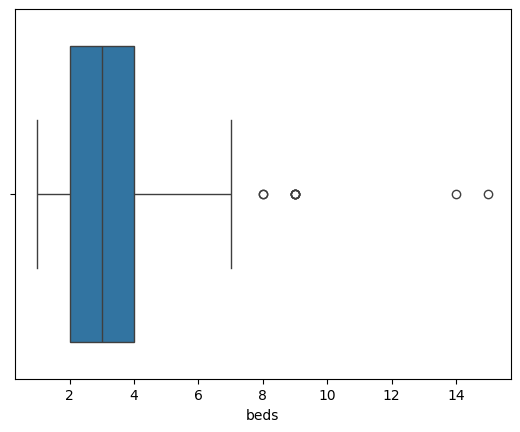

In [7]:
# mendeteksi outliers untuk fitur beds
sns.boxplot(x=rumah['beds'])

<Axes: xlabel='baths'>

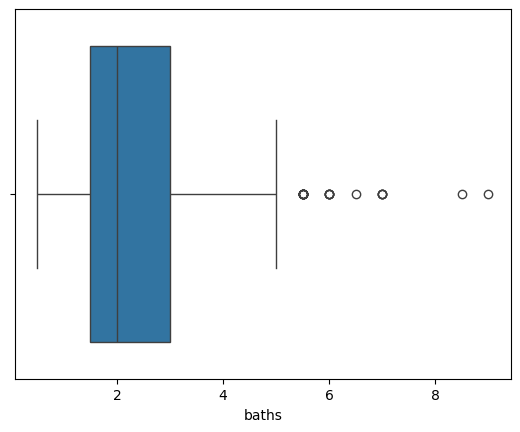

In [8]:
# mendeteksi outliers untuk fitur baths
sns.boxplot(x=rumah['baths'])

<Axes: xlabel='size'>

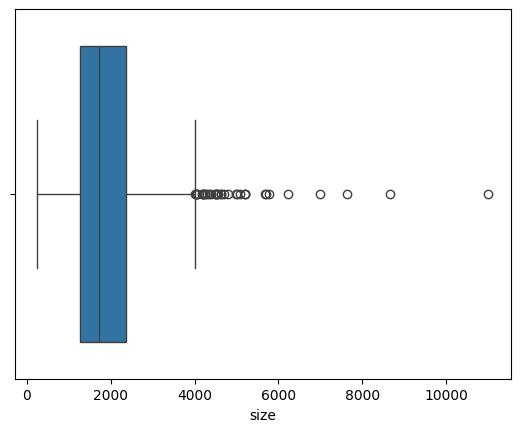

In [9]:
# mendeteksi outliers untuk fitur size
sns.boxplot(x=rumah['size'])

In [10]:
# untuk membuat batas bawah, Q1 dikurangi dengan 1,5 * IQR. Kemudian, untuk membuat batas atas, tambahkan 1.5 * IQR dengan Q3
Q1 = rumah.quantile(0.25)
Q3 = rumah.quantile(0.75)
IQR=Q3-Q1
rumah=rumah[~((rumah<(Q1-1.5*IQR))|(rumah>(Q3+1.5*IQR))).any(axis=1)]

# cek ukuran dataset setelah outliers didrop
rumah.shape

<ipython-input-10-08a9070253f8>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = rumah.quantile(0.25)
<ipython-input-10-08a9070253f8>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = rumah.quantile(0.75)
<ipython-input-10-08a9070253f8>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rumah=rumah[~((rumah<(Q1-1.5*IQR))|(rumah>(Q3+1.5*IQR))).any(axis=1)]


(1380, 8)

- Univariate analysis

    Selanjutnya, akan dilakukan proses analisis data dengan teknik Univariate EDA. Pertama, lakukan analisis pada fitur numerik.
    Peningkatan harga rumah sebanding dengan penurunan jumlah sampel. Hal ini dapat dilihat jelas dari histogram "price" yang grafiknya mengalami penurunan seiring dengan semakin banyaknya jumlah sampel (sumbu x).
    Semakin tinggi size, jumlah beds, dan jumlah baths dalam rumah, maka semakin mahal pula harga rumah.

In [11]:
# univariate analysis untuk fitur numerik
numerical_features = ['beds', 'baths', 'size', 'lot_size', 'zip_code', 'price']

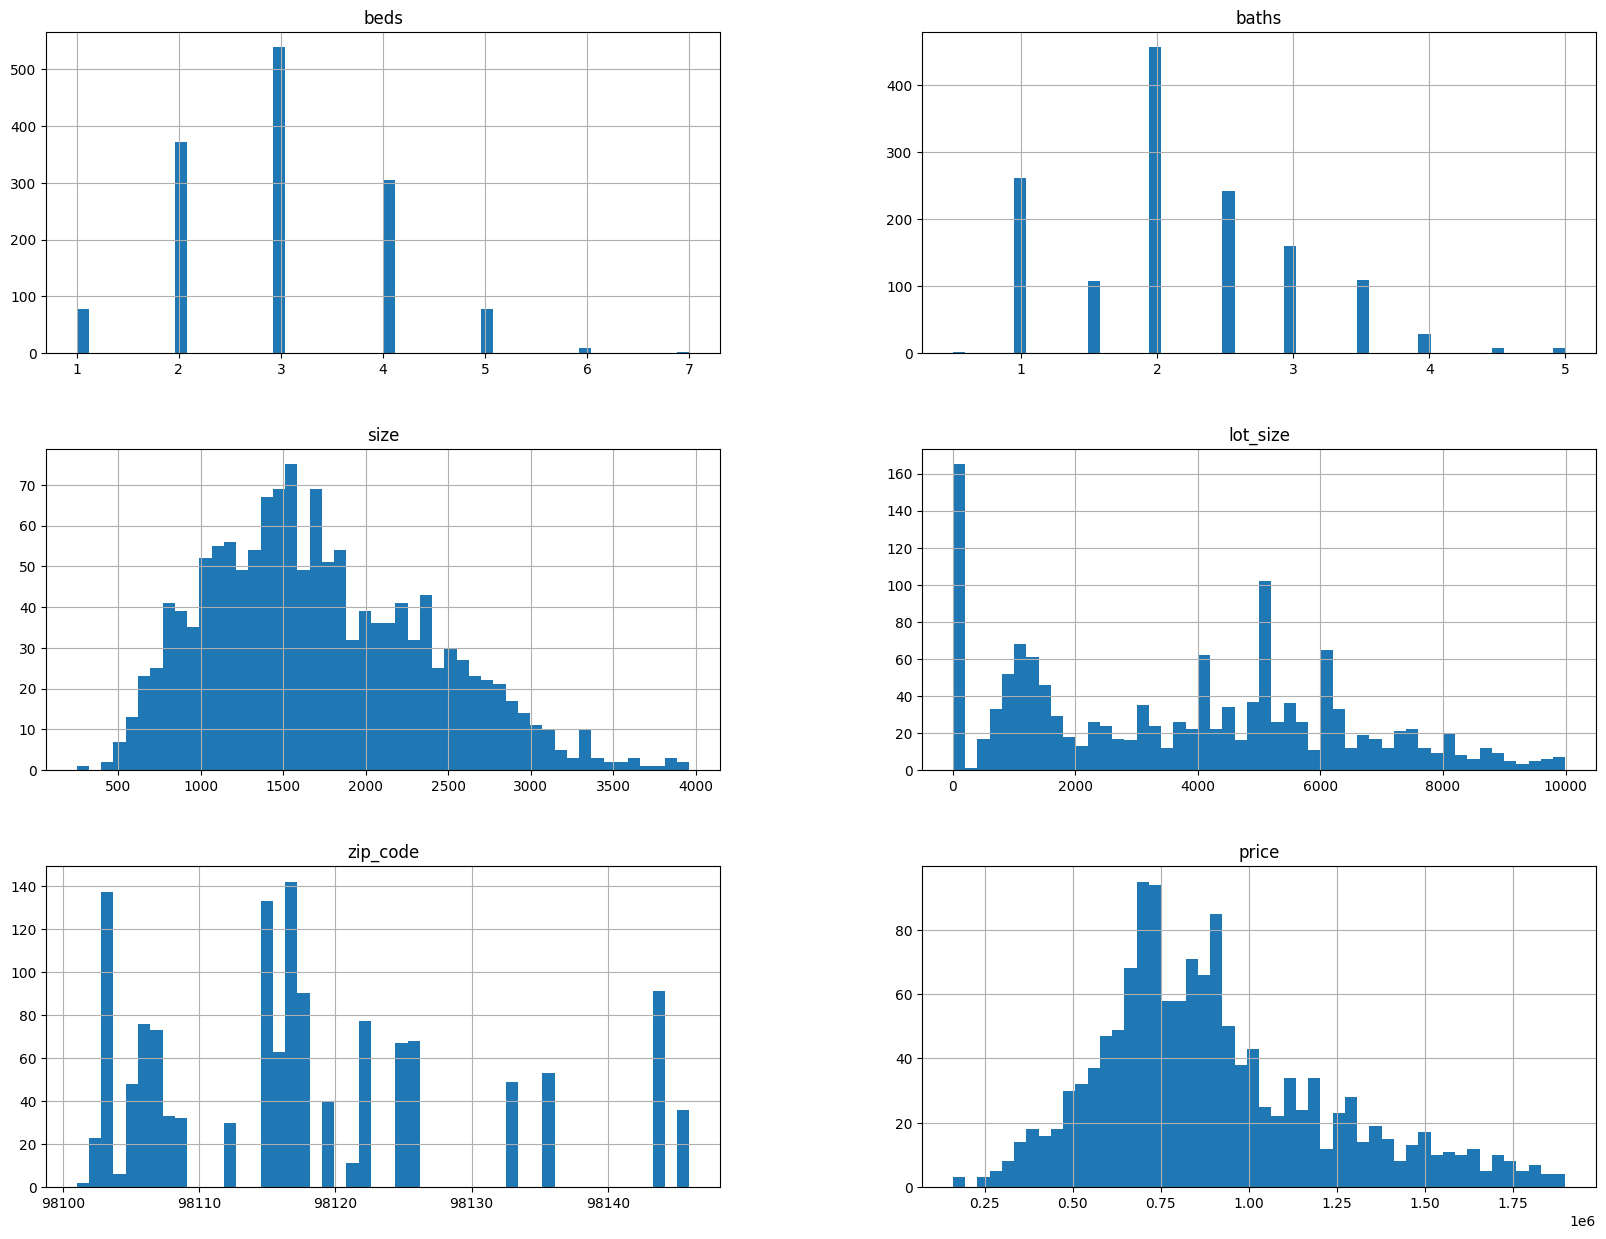

In [12]:
# melihat histogram masing-masing fiturnya menggunakan kode berikut
rumah.hist(bins=50, figsize=(20,15))
plt.show()

- Multivariate analysis

    Selanjutnya, akan dilakukan analisis data pada fitur numerik menggunakan teknik Multivariate EDA menggunakan fungsi pairplot() dan juga akan mengobservasi korelasi antara fitur numerik dengan fitur target menggunakan fungsi corr().
    Pada pola sebaran data grafik pairplot, terlihat fitur "size" memiliki korelasi positif dengan fitur "price". Sedangkan kedua fitur "lot_size" dan "price" tidak memliki korelasi karena tidak membetuk pola.


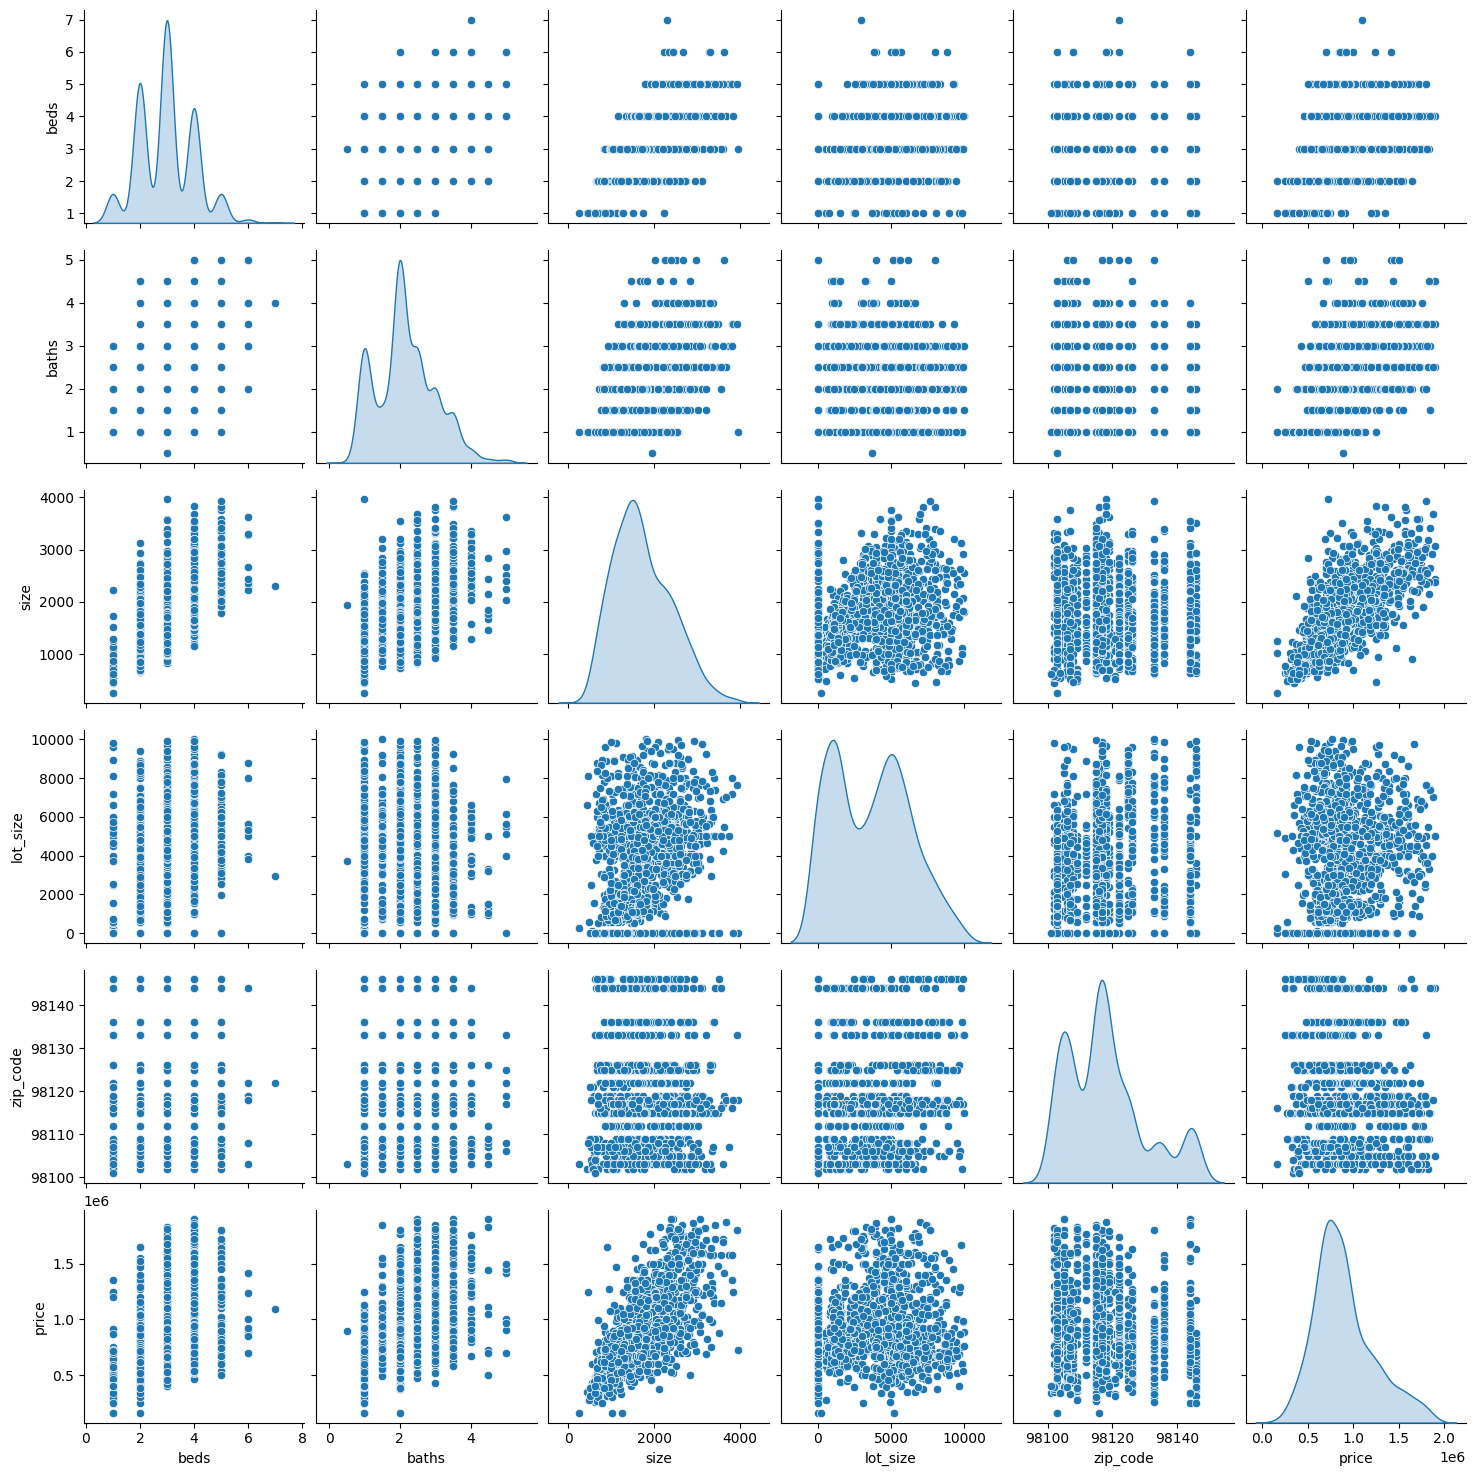

In [13]:
# mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(rumah, diag_kind = 'kde')

<ipython-input-14-713b6c8ae43d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = rumah.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

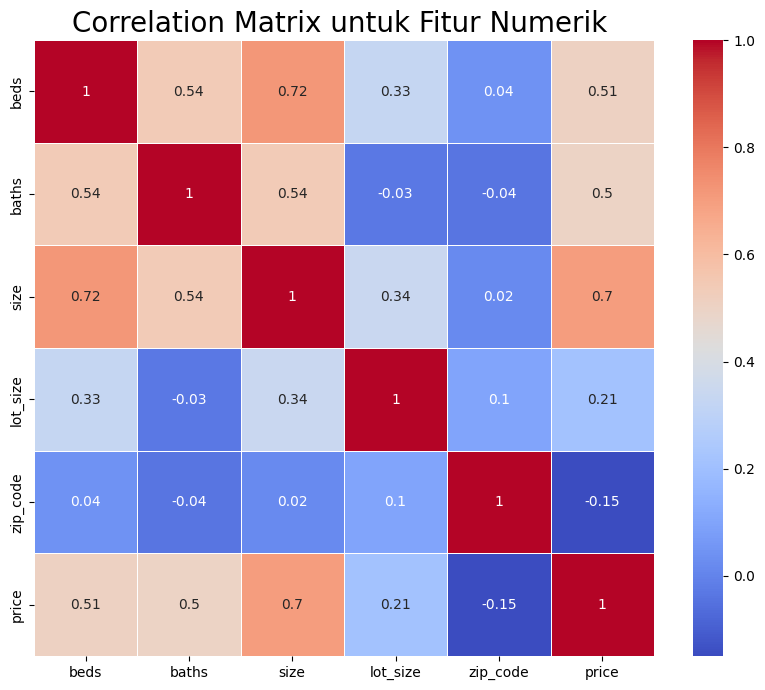

In [14]:
# evaluasi skor korelasi pada data numerik
plt.figure(figsize=(10, 8))
correlation_matrix = rumah.corr().round(2)

# menge-print nilai di dalam kotak menggunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Pada grafik korelasi terlihat bahwa fitur 'beds', 'baths', dan 'size' memiliki skor korelasi yang besar dengan fitur target 'price'. Artinya, fitur 'price' berkorelasi tinggi dengan ketiga fitur tersebut. Sementara itu, fitur 'lot_size' dan 'zip_code' memiliki korelasi yang sangat kecil sehingga fitur tersebut dapat di-drop.


In [15]:
# membuang fitur dengan korelasi yang sangat kecil dan membuang fitur katergori karena variabelnya sama semua
rumah.drop(['lot_size', 'zip_code', 'size_units', 'lot_size_units'], inplace=True, axis=1)
rumah.head()

<ipython-input-15-f92e29b81fa0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rumah.drop(['lot_size', 'zip_code', 'size_units', 'lot_size_units'], inplace=True, axis=1)


,beds,baths,size,price
0,3,2.5,2590.0,795000.0
1,4,2.0,2240.0,915000.0
2,4,3.0,2040.0,950000.0
5,2,2.0,1190.0,740000.0
6,1,1.0,670.0,460000.0


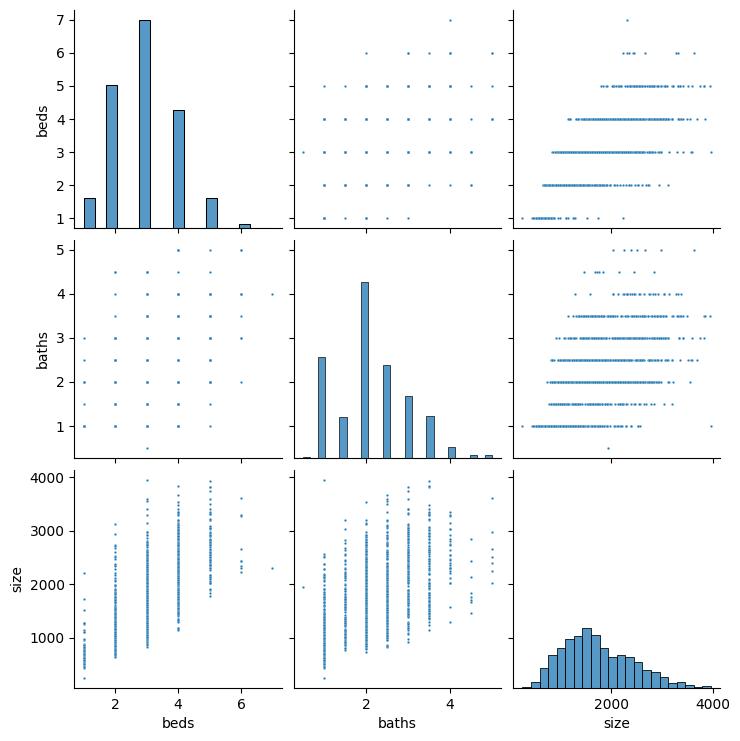

In [16]:
# mengecek menggunakan fungsi pairplot
sns.pairplot(rumah[['beds','baths','size']], plot_kws={"s": 3});

## Data Preparation

- Train-Test-Split

  Proses membagi himpunan data menjadi data pelatihan dan pengujian adalah langkah yang diperlukan sebelum membuat model. Penting untuk memperkuat semua data yang tersedia untuk menilai beberapa generalisasi model ke data baru. Perlu dicatat bahwa setiap transformasi data yang dilakukan juga berfungsi sebagai komponen model. Karena data test set (uji) mentah, semua transformasi harus dilakukan pada data latih.

In [17]:
X = rumah.drop(["price"],axis =1)
y = rumah["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [18]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1380
Total # of sample in train dataset: 1104
Total # of sample in test dataset: 276


- Standarisasi

  Ketika algoritma pembelajaran mesin diterapkan pada data dengan distribusi yang serupa atau menyimpang, mereka berkinerja lebih baik dan menyatu lebih cepat. Proses penskalaan dan standardisasi membantu mengubah data menjadi format yang lebih mudah dipahami oleh algoritma. Standardisasi adalah teknik transformasi yang paling umum digunakan dalam proses pembangunan model. Ini tidak akan mengubah fitur numerik menggunakan encoding. Teknik yang digunakan adalah StandarScaler dari library Scikit-learn.

In [19]:
numerical_features = ['beds','baths','size']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,beds,baths,size
1779,-1.973241,-1.412389,-1.635772
316,0.014403,-0.809653,-0.143301
1385,-0.979419,0.395818,-1.011919
1666,-1.973241,-1.412389,-1.416378
2004,-0.979419,-0.206917,-0.744767


In [20]:
X_train[numerical_features].describe().round(4)

,beds,baths,size
count,1104.0000,1104.0000,1104.0000
mean,0.0000,-0.0000,0.0000
std,1.0005,1.0005,1.0005
min,-1.9732,-2.0151,-2.2029
25%,-0.9794,-0.8097,-0.7679
50%,0.0144,-0.2069,-0.1209
75%,1.0082,0.3958,0.6776
max,3.9897,3.4095,3.3342


## Modeling

Model akan dikembangkan dengan 3 algoritma yang berbeda, dan mencari mana yang memiliki performa paling baik.

In [21]:
# menyiapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

1. k-NN

  Langkah yang pertama, model KNN diinisialisasi dengan menentukan jumlah tetangga terdekat (parameter n_neighbors).

In [22]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

2. Random Forest

  Model Random Forest diinisialisasi dengan menentukan beberapa hyperparameter.



In [23]:
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

3. Boosting Algorithm

  Model Boosting (AdaBoostRegressor) diinisialisasi dengan menentukan hyperparameter tertentu. Parameter yang diatur adalah learning_rate dengan nilai 0.05. random_state digunakan untuk memastikan reproduktibilitas hasil.


In [24]:
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [25]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

## Evaluation

- Metrik yang digunakan adalah MSE

  Mean Squared Error (MSE) adalah salah satu metrik evaluasi yang umum digunakan dalam regresi untuk mengukur sejauh mana perbedaan antara nilai prediksi model dengan nilai aktual (ground truth). MSE dihitung dengan menjumlahkan kuadrat selisih antara setiap nilai prediksi dan nilai aktual, kemudian diambil rata-rata dari seluruh data. Nilai MSE semakin kecil semakin baik. Nilai MSE sama dengan nol berarti model memberikan prediksi yang sempurna sesuai dengan nilai aktual.

In [26]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

# Panggil mse
mse

,train,test
KNN,44360753.266994,54239740.502329
RF,12390218.332403,58255407.24918
Boosting,49336053.971147,51079691.292662


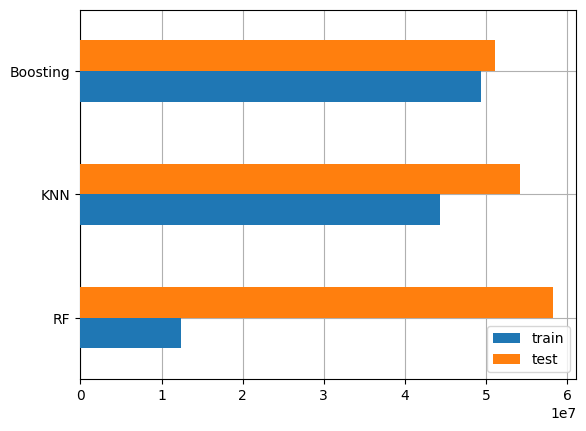

In [27]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [28]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
1680,1725000.0,1285250.0,1316599.0,1306669.6
